# Environment

In [112]:
import pandas as pd
import yaml
import os
import sys
import importlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

BASE_DIR = "/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/results/no_dedup/cpg_enrichment/neu_vs_nsc_exo"

ENRICHMENT_FILE = f"{BASE_DIR}/cpg_enrichment_parallel.csv"
print(ENRICHMENT_FILE)

OUTPUT_LISTS_PATH = f"{BASE_DIR}/lists"
print(OUTPUT_LISTS_PATH)
os.makedirs(OUTPUT_LISTS_PATH, exist_ok=True)

# Set pandas display options to show all columns without wrapping
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't wrap wide DataFrames
pd.set_option('display.max_colwidth', None) # Don't truncate column contents

sys.path.append("/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/code7_cpg_enrichment")
try:
    import functions
    importlib.reload(functions)
    from functions import *
except ModuleNotFoundError:
    print("Warning: Could not import functions module. Make sure functions.py exists in the code7_cpg_enrichment directory.")


/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/results/no_dedup/cpg_enrichment/neu_vs_nsc_exo/cpg_enrichment_parallel.csv
/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/results/no_dedup/cpg_enrichment/neu_vs_nsc_exo/lists


# Load Data

In [113]:
# Load the CpG enrichment results
cpg_enrichment_df = pd.read_csv(ENRICHMENT_FILE)

In [114]:
# Display first few rows and basic info
print("DataFrame shape:", cpg_enrichment_df.shape)
print("\nFirst few rows:")
display(cpg_enrichment_df.head())
print("\nColumn names:")
print(cpg_enrichment_df.columns.tolist())

DataFrame shape: (14220, 24)

First few rows:


,chr,start,end,neu_signal,nsc_signal,fold_change,pvalue,binding_type,binding_type_by_peaks,significant,neu_replicates_with_signal,nsc_replicates_with_signal,neu_replicate_signals,nsc_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,neu_replicates_with_peaks,nsc_replicates_with_peaks,neu_peak_scores_by_rep,nsc_peak_scores_by_rep,region_start,region_end
0,chr1,3670619,3671074,44.531091,13.042663,3.414264,0.100000,both,neu_only,False,3,3,"43.611977159783706,52.05083147360805,37.93046437749823","8.58457662022296,18.074157164901866,12.46925556753564",2159,455,CpG:,613,3,1,6.08946;8.05807;5.49517,6.06037,3670396,3672555
1,chr1,3671654,3672156,44.531091,13.042663,3.414264,0.100000,both,both,False,3,3,"43.611977159783706,52.05083147360805,37.93046437749823","8.58457662022296,18.074157164901866,12.46925556753564",2159,502,CpG:,613,3,2,6.08946;8.05807;5.49517,5.54931;6.06037,3670396,3672555
2,chr1,4491701,4493673,3.420399,28.438007,0.120276,0.333333,both,nsc_only,False,2,2,"2.429280403817054,0.0,7.831916790197392","44.398371658702885,0.0,40.91564872477314",404,1972,CpG:,619,0,2,NaN,6.0982;5.8282,4492305,4492709
3,chr1,4571641,4572075,18.511282,25.026296,0.739673,0.700000,both,both,False,3,3,"13.692992781864778,18.217554917468977,23.623298807605227","31.500924768035347,13.556918122386204,30.021045078151403",786,434,CpG:,619,3,3,3.91321;3.39512;3.76449,4.35039;6.82732;3.40697,4571438,4572224
4,chr1,4785376,4785814,53.115879,25.271272,2.101828,0.100000,both,both,False,3,3,"55.76285252373141,46.45094047384572,57.13384269290883","7.870091419357685,25.255789091440743,42.687935247533154",2216,438,CpG:,621,3,3,11.1372;19.5773;9.32821,2.96862;6.6373;7.27926,4784076,4786292



Column names:
['chr', 'start', 'end', 'neu_signal', 'nsc_signal', 'fold_change', 'pvalue', 'binding_type', 'binding_type_by_peaks', 'significant', 'neu_replicates_with_signal', 'nsc_replicates_with_signal', 'neu_replicate_signals', 'nsc_replicate_signals', 'region_length', 'cpg_length', 'cpg_score', 'cpg_name', 'neu_replicates_with_peaks', 'nsc_replicates_with_peaks', 'neu_peak_scores_by_rep', 'nsc_peak_scores_by_rep', 'region_start', 'region_end']


In [115]:
cpg_enrichment_df = cpg_enrichment_df.rename(columns={'fold_change': 'enrichment'})

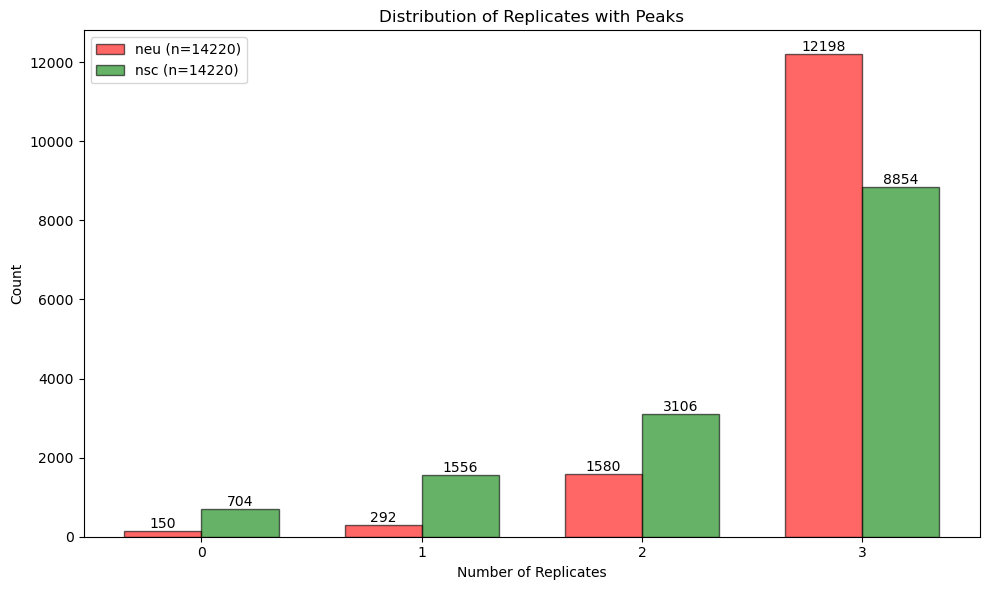

In [116]:
# Create single plot
plt.figure(figsize=(10, 6))

# Get data for plotting
x = np.arange(4)  # 0 through 3 replicates
neu_counts = [len(cpg_enrichment_df[cpg_enrichment_df['neu_replicates_with_peaks'] == i]) for i in range(4)]
nsc_counts = [len(cpg_enrichment_df[cpg_enrichment_df['nsc_replicates_with_peaks'] == i]) for i in range(4)]

# Plot bars side by side
width = 0.35
plt.bar(x - width/2, neu_counts, width, label=f'neu (n={sum(neu_counts)})', color='red', alpha=0.6, edgecolor='black')
plt.bar(x + width/2, nsc_counts, width, label=f'nsc (n={sum(nsc_counts)})', color='green', alpha=0.6, edgecolor='black')

# Add value labels on top of each bar
for i in range(len(x)):
    plt.text(x[i] - width/2, neu_counts[i], str(neu_counts[i]), 
             ha='center', va='bottom')
    plt.text(x[i] + width/2, nsc_counts[i], str(nsc_counts[i]),
             ha='center', va='bottom')

plt.title('Distribution of Replicates with Peaks')
plt.xlabel('Number of Replicates')
plt.ylabel('Count')
plt.xticks(x)
plt.legend()

plt.tight_layout()
plt.show()

In [117]:
# Sort the DataFrame by enrichment value in descending order
cpg_enrichment_df_sorted = cpg_enrichment_df.sort_values(by='enrichment', ascending=False)

# Split data based on binding type

## By signal value

Non zero signal in minumum 2 replicates

In [118]:
# Split data based on binding type
neu_only_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'neu_only']
nsc_only_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'nsc_only'] 
both_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'both']

# Print sizes of each group
print(f"Number of CpG islands bound by neu only: {len(neu_only_df_by_signal)}")
print(f"Number of CpG islands bound by nsc only: {len(nsc_only_df_by_signal)}")
print(f"Number of CpG islands bound by both: {len(both_df_by_signal)}")


Number of CpG islands bound by neu only: 160
Number of CpG islands bound by nsc only: 6
Number of CpG islands bound by both: 14054


## By peaks number

Minimum 2 replicates with peaks

In [119]:
# Split data based on binding type
neu_only_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'neu_only']
nsc_only_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'nsc_only'] 
both_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'both']

# Print sizes of each group
print(f"Number of CpG islands bound by neu only: {len(neu_only_df_by_peaks)}")
print(f"Number of CpG islands bound by nsc only: {len(nsc_only_df_by_peaks)}")
print(f"Number of CpG islands bound by both: {len(both_df_by_peaks)}")


Number of CpG islands bound by neu only: 2260
Number of CpG islands bound by nsc only: 442
Number of CpG islands bound by both: 11518


# Data analysis

## Both: enrichment distribution

In [120]:
print("Summary statistics of enrichment values selected by signal:")
print(both_df_by_signal['enrichment'].describe())

print("\nSummary statistics of enrichment values selected by peaks:")
print(both_df_by_peaks['enrichment'].describe())

Summary statistics of enrichment values selected by signal:
count    14054.000000
mean         2.174430
std          2.316891
min          0.023256
25%          1.208840
50%          1.771754
75%          2.563794
max        105.875145
Name: enrichment, dtype: float64

Summary statistics of enrichment values selected by peaks:
count    11518.000000
mean         2.005129
std          1.233911
min          0.239734
25%          1.209668
50%          1.740827
75%          2.474332
max         36.277756
Name: enrichment, dtype: float64


== fold change (Neuron/NSC) ==

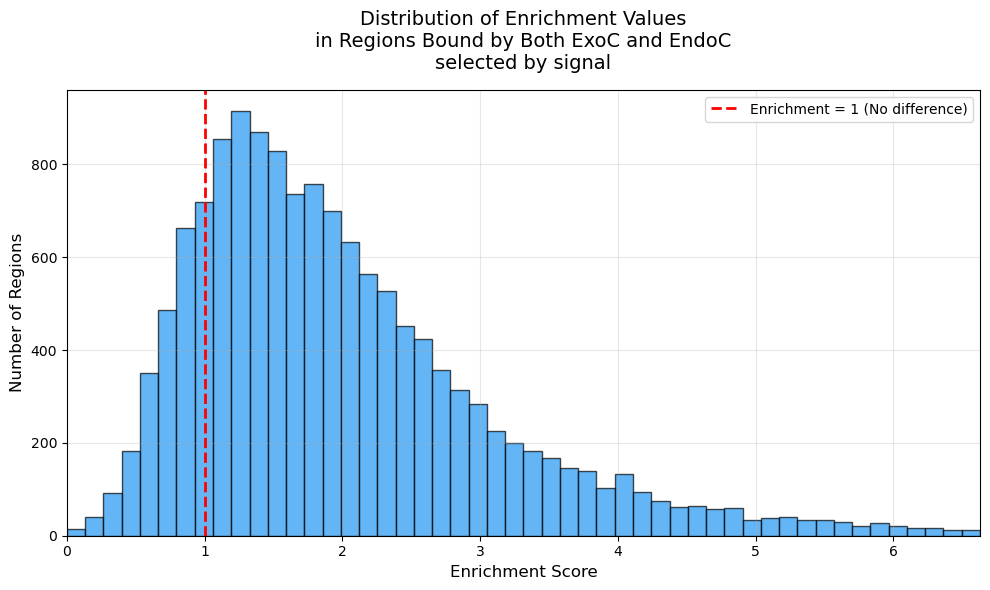

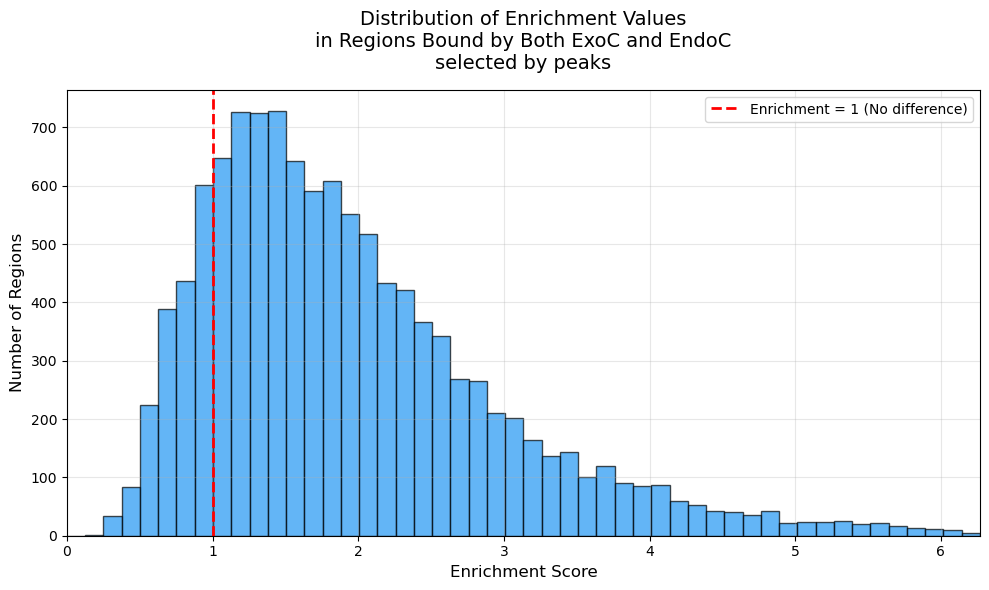

In [121]:
range_min_signal, range_max_signal = plot_enrichment_distribution(both_df_by_signal, title="selected by signal")
range_min_peaks, range_max_peaks = plot_enrichment_distribution(both_df_by_peaks, title="selected by peaks")


## Both: enrichment outliers

In [122]:
outliers_df_signal = both_df_by_signal[both_df_by_signal['enrichment'] > range_max_signal].copy()
print(f"\nNumber of outliers selected by signal(enrichment > {range_max_signal}):", len(outliers_df_signal))

outliers_df_peaks = both_df_by_peaks[both_df_by_peaks['enrichment'] > range_max_peaks].copy()
print(f"\nNumber of outliers selected by peaks(enrichment > {range_max_peaks}):", len(outliers_df_peaks))


Number of outliers selected by signal(enrichment > 6.628654584652809): 248

Number of outliers selected by peaks(enrichment > 6.2683225498923045): 112


In [123]:
outliers_df_signal.head()

,chr,start,end,neu_signal,nsc_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,neu_replicates_with_signal,nsc_replicates_with_signal,neu_replicate_signals,nsc_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,neu_replicates_with_peaks,nsc_replicates_with_peaks,neu_peak_scores_by_rep,nsc_peak_scores_by_rep,region_start,region_end
7833,chr2,163438488,163438801,32.088184,0.303076,105.875145,0.2,both,neu_only,False,3,2,"34.12863393883443,26.766531263426955,35.36938533411477","0.0,0.2970265666187038,0.6122005320752413",1566,313,CpG:,1831,3,0,4.63379;4.8352;4.472,NaN,163437893,163439459
2917,chr12,72303786,72304071,100.890630,1.511462,66.750355,0.1,both,neu_only,False,3,3,"87.80255278886308,101.03312273982392,113.83621307433481","3.8133390420226023,0.4508343649437035,0.27021277631868607",2083,285,CpG:,1136,3,1,9.43278;16.2469;13.7099,8.10713,72303365,72305448
1583,chr11,16257539,16257942,45.158613,0.755741,59.754097,0.2,both,neu_only,False,3,2,"28.213395055095454,43.45404096969643,63.808403470569715","0.0,0.5763184429701427,1.6909041710922545",1604,403,CpG:,709,3,0,3.81413;8.2896;5.36619,NaN,16257037,16258641
10502,chr5,149015495,149015859,34.383980,0.612759,56.113347,0.1,both,neu_only,False,3,3,"42.39771581249009,15.94726901815043,44.8069565371569","0.2971120259331216,1.2260382368123959,0.3151279097280281",1423,364,CpG:,1721,2,0,6.42867;7.23491,NaN,149014497,149015920
6772,chr19,48205180,48206752,35.576699,0.676638,52.578643,0.1,both,neu_only,False,3,3,"22.101946822455783,57.059864286888775,27.56828635755045","0.07219781641100274,0.1832730652856045,1.7744426165215212",5124,1572,CpG:,952,3,0,"4.24432,4.7778;8.32957;4.54848",NaN,48203366,48208490


In [124]:
print_outlier_groups(outliers_df_signal, "signal")


First 5 outliers selected by signal:
chr2:163,438,488-163,438,801                      enrichment: 105.87514458670988
chr12:72,303,786-72,304,071                       enrichment: 66.7503552561876
chr11:16,257,539-16,257,942                       enrichment: 59.75409677685629
chr5:149,015,495-149,015,859                      enrichment: 56.11334721393035
chr19:48,205,180-48,206,752                       enrichment: 52.57864315922003

Middle 5 outliers selected by signal:
chr19:24,961,573-24,961,828                       enrichment: 8.853654263105861
chr11:96,034,863-96,035,086                       enrichment: 8.830920743376165
chr7:126,884,694-126,884,964                      enrichment: 8.798640532014769
chr16:57,606,479-57,606,948                       enrichment: 8.785649701847094
chr10:77,902,087-77,902,537                       enrichment: 8.763658478456493

Last 5 outliers selected by signal:
chr3:105,687,017-105,688,004                      enrichment: 6.675653818895769
chr1:6

In [125]:
n_rows = len(outliers_df_signal)

print("\nFirst 5 outliers selected by signal:")
for _, row in outliers_df_signal[:5].iterrows():
    print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")

if n_rows > 10:
    mid_start = n_rows//2 - 2
    print("\nMiddle 5 outliers selected by signal:")
    for _, row in outliers_df_signal[mid_start:mid_start+5].iterrows():
        print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")

print("\nLast 5 outliers selected by signal:")
for _, row in outliers_df_signal[-5:].iterrows():
    print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")


First 5 outliers selected by signal:
chr2:163,438,488-163,438,801                      enrichment: 105.87514458670988
chr12:72,303,786-72,304,071                       enrichment: 66.7503552561876
chr11:16,257,539-16,257,942                       enrichment: 59.75409677685629
chr5:149,015,495-149,015,859                      enrichment: 56.11334721393035
chr19:48,205,180-48,206,752                       enrichment: 52.57864315922003

Middle 5 outliers selected by signal:
chr19:24,961,573-24,961,828                       enrichment: 8.853654263105861
chr11:96,034,863-96,035,086                       enrichment: 8.830920743376165
chr7:126,884,694-126,884,964                      enrichment: 8.798640532014769
chr16:57,606,479-57,606,948                       enrichment: 8.785649701847094
chr10:77,902,087-77,902,537                       enrichment: 8.763658478456493

Last 5 outliers selected by signal:
chr3:105,687,017-105,688,004                      enrichment: 6.675653818895769
chr1:6

In [126]:
print_outlier_groups(outliers_df_peaks, "peaks")


First 5 outliers selected by peaks:
chr10:79,959,868-79,960,557                       enrichment: 36.27775584583844
chr11:11,461,979-11,462,326                       enrichment: 16.267529386994056
chr5:143,112,265-143,113,080                      enrichment: 16.06816573360601
chr12:69,158,619-69,159,291                       enrichment: 15.397786892278702
chr1:178,187,432-178,188,253                      enrichment: 12.79278979071777

Middle 5 outliers selected by peaks:
chr1:159,231,781-159,232,536                      enrichment: 7.347045866794669
chrX:101,532,486-101,533,085                      enrichment: 7.287389829458839
chr9:7,836,877-7,837,494                          enrichment: 7.255071810774878
chr17:24,719,572-24,720,369                       enrichment: 7.238269004372708
chr4_GL456216_random:15,727-17,216                enrichment: 7.225459544634239

Last 5 outliers selected by peaks:
chr7:18,991,023-18,991,368                        enrichment: 6.322260527197086
chrX:10

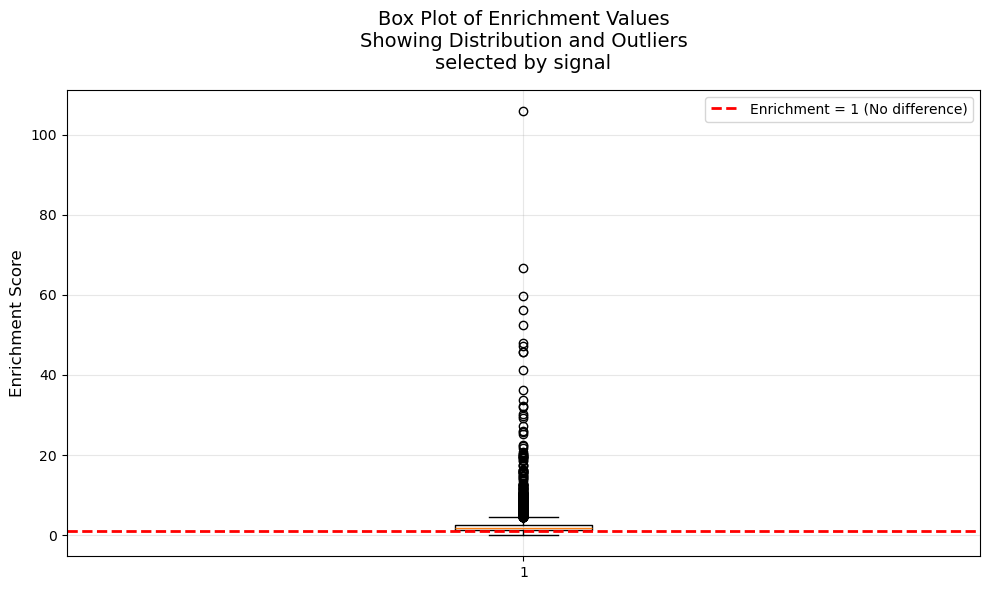

In [127]:
# plot_enrichment_boxplot(both_df_by_peaks, title="selected by peaks")
plot_enrichment_boxplot(both_df_by_signal, title="selected by signal")

In [128]:
outliers_df_signal["nsc_replicates_with_peaks"].value_counts()

signal_nsc_zero_peaks  = outliers_df_signal[outliers_df_signal["nsc_replicates_with_peaks"] == 0]
signal_nsc_one_peaks   = outliers_df_signal[outliers_df_signal["nsc_replicates_with_peaks"] == 1]
signal_nsc_two_peaks   = outliers_df_signal[outliers_df_signal["nsc_replicates_with_peaks"] == 2]
signal_nsc_three_peaks = outliers_df_signal[outliers_df_signal["nsc_replicates_with_peaks"] == 3]

outliers_df_peaks["nsc_replicates_with_peaks"].value_counts()

peaks_nsc_zero_peaks  = outliers_df_peaks[outliers_df_peaks["nsc_replicates_with_peaks"] == 0]
peaks_nsc_one_peaks   = outliers_df_peaks[outliers_df_peaks["nsc_replicates_with_peaks"] == 1]
peaks_nsc_two_peaks   = outliers_df_peaks[outliers_df_peaks["nsc_replicates_with_peaks"] == 2]
peaks_nsc_three_peaks = outliers_df_peaks[outliers_df_peaks["nsc_replicates_with_peaks"] == 3]

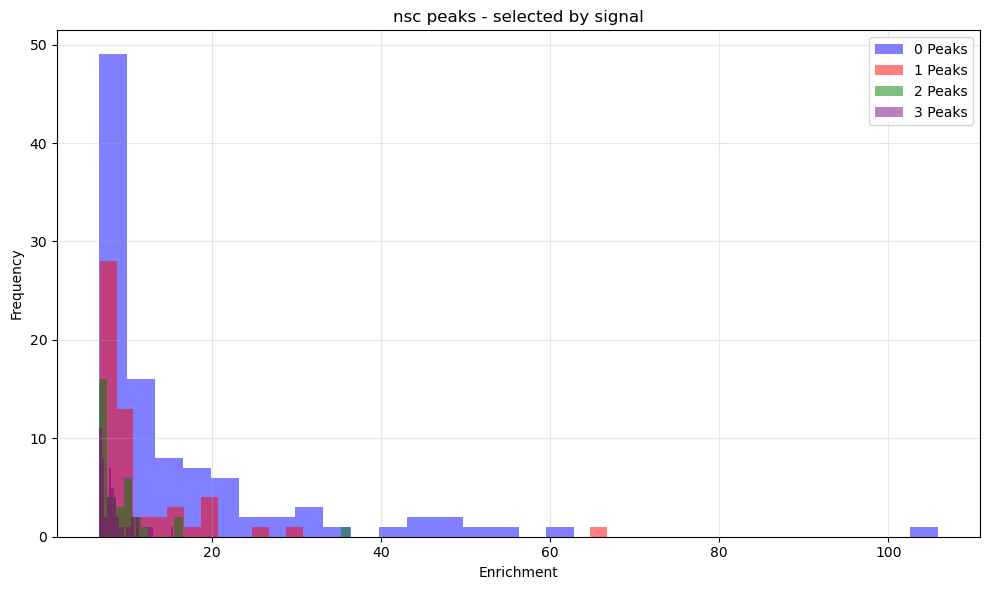

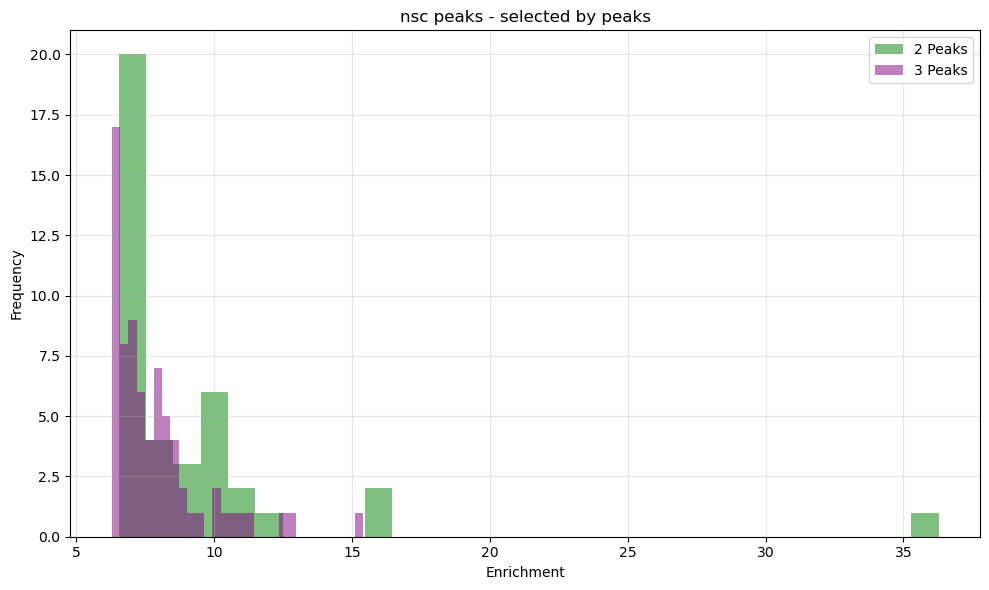

In [129]:
# Classify and plot for signal and peaks outliers
peaks_zero_peaks_signal, peaks_one_peaks_signal, peaks_two_peaks_signal, peaks_three_peaks_signal = plot_by_peaks(outliers_df_signal, peaks_column='nsc_replicates_with_peaks', title="nsc peaks - selected by signal")
peaks_zero_peaks_peaks, peaks_one_peaks_peaks, peaks_two_peaks_peaks, peaks_three_peaks_peaks = plot_by_peaks(outliers_df_peaks, peaks_column='nsc_replicates_with_peaks', title="nsc peaks - selected by peaks")

In [130]:
print_outlier_groups(peaks_two_peaks_peaks, "peaks")


First 5 outliers selected by peaks:
chr10:79,959,868-79,960,557                       enrichment: 36.27775584583844
chr11:11,461,979-11,462,326                       enrichment: 16.267529386994056
chr5:143,112,265-143,113,080                      enrichment: 16.06816573360601
chr4:46,389,088-46,389,594                        enrichment: 12.127122320654
chr16:37,384,329-37,385,060                       enrichment: 11.19735545216544

Middle 5 outliers selected by peaks:
chr7:142,532,885-142,533,325                      enrichment: 7.979163562355865
chr10:79,766,462-79,767,766                       enrichment: 7.758933912587697
chr5:125,433,816-125,434,258                      enrichment: 7.374532614608529
chr1:159,231,781-159,232,536                      enrichment: 7.347045866794669
chr9:7,836,877-7,837,494                          enrichment: 7.255071810774878

Last 5 outliers selected by peaks:
chr5:37,163,077-37,163,496                        enrichment: 6.644866174823577
chr17:33,8

In [131]:
print_outlier_groups(peaks_two_peaks_signal, "signal")


First 5 outliers selected by signal:
chr10:79,959,868-79,960,557                       enrichment: 36.27775584583844
chr11:11,461,979-11,462,326                       enrichment: 16.267529386994056
chr5:143,112,265-143,113,080                      enrichment: 16.06816573360601
chr4:46,389,088-46,389,594                        enrichment: 12.127122320654
chr16:37,384,329-37,385,060                       enrichment: 11.19735545216544

Middle 5 outliers selected by signal:
chr7:144,553,371-144,554,022                      enrichment: 8.486494701031603
chr12:98,628,037-98,628,349                       enrichment: 8.035705579261137
chr7:142,532,885-142,533,325                      enrichment: 7.979163562355865
chr10:79,766,462-79,767,766                       enrichment: 7.758933912587697
chr5:125,433,816-125,434,258                      enrichment: 7.374532614608529

Last 5 outliers selected by signal:
chr11:12,036,489-12,038,108                       enrichment: 6.791242470553614
chr11:8

## Regions length distribution

### Region length - defined by the outermost peaks coordinates

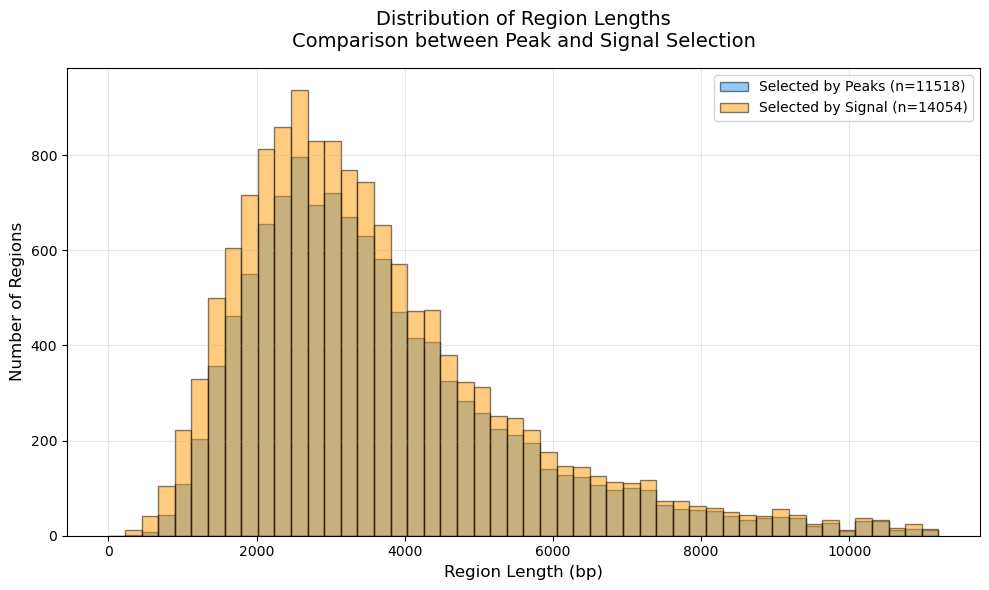

In [132]:
plot_region_length_comparison(both_df_by_peaks, both_df_by_signal, region_length_col='region_length')

In [133]:
both_df_sorted_by_region_length_signal = both_df_by_signal.sort_values(by='region_length', ascending=False)
both_df_sorted_by_region_length_signal.head()

,chr,start,end,neu_signal,nsc_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,neu_replicates_with_signal,nsc_replicates_with_signal,neu_replicate_signals,nsc_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,neu_replicates_with_peaks,nsc_replicates_with_peaks,neu_peak_scores_by_rep,nsc_peak_scores_by_rep,region_start,region_end
9474,chr4,148951660,148952711,28.850291,9.186878,3.140380,0.1,both,both,False,3,3,"31.444062274246793,29.582429402940488,25.52438127728439","8.980579140712468,7.6352371813937525,10.944817932426123",34979,1051,CpG:,1721,3,2,4.57641;11.3859;6.00517,6.8287;5.38629,148919192,148954171
9473,chr4,148938649,148938905,28.850291,9.186878,3.140380,0.1,both,neu_only,False,3,3,"31.444062274246793,29.582429402940488,25.52438127728439","8.980579140712468,7.6352371813937525,10.944817932426123",34979,256,CpG:,1721,3,1,4.57641;3.65557;5.1156,2.58773,148919192,148954171
6816,chr19,59467141,59467557,41.632720,14.797893,2.813422,0.1,both,neu_only,False,3,3,"42.351129533752356,43.392525259849556,39.154506400136775","14.829227887920277,14.758921251135327,14.805530905124069",23045,416,CpG:,1038,3,0,5.93023;12.3771;6.60721,NaN,59450888,59473933
6817,chr19,59469037,59469305,41.632720,14.797893,2.813422,0.1,both,neu_only,False,3,3,"42.351129533752356,43.392525259849556,39.154506400136775","14.829227887920277,14.758921251135327,14.805530905124069",23045,268,CpG:,1038,3,0,5.93023;12.3771;6.60721,NaN,59450888,59473933
7907,chr2,167777455,167777726,79.994576,20.618723,3.879706,0.1,both,both,False,3,3,"71.8351678906179,109.61424505702277,58.5343156873228","19.621144043651906,19.076032322838408,23.15899270027954",21038,271,CpG:,1865,3,3,10.3069;21.2532;8.05397,7.3405;6.01769;8.33665,167759249,167780287


In [134]:
both_df_sorted_by_region_length_peaks = both_df_by_peaks.sort_values(by='region_length', ascending=False)
both_df_sorted_by_region_length_peaks.head()

,chr,start,end,neu_signal,nsc_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,neu_replicates_with_signal,nsc_replicates_with_signal,neu_replicate_signals,nsc_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,neu_replicates_with_peaks,nsc_replicates_with_peaks,neu_peak_scores_by_rep,nsc_peak_scores_by_rep,region_start,region_end
9474,chr4,148951660,148952711,28.850291,9.186878,3.140380,0.1,both,both,False,3,3,"31.444062274246793,29.582429402940488,25.52438127728439","8.980579140712468,7.6352371813937525,10.944817932426123",34979,1051,CpG:,1721,3,2,4.57641;11.3859;6.00517,6.8287;5.38629,148919192,148954171
7907,chr2,167777455,167777726,79.994576,20.618723,3.879706,0.1,both,both,False,3,3,"71.8351678906179,109.61424505702277,58.5343156873228","19.621144043651906,19.076032322838408,23.15899270027954",21038,271,CpG:,1865,3,3,10.3069;21.2532;8.05397,7.3405;6.01769;8.33665,167759249,167780287
6815,chr19,59457915,59459984,44.975806,16.562136,2.715580,0.1,both,both,False,3,3,"45.20665201607052,47.32772054462123,42.393046196893664","16.726131519218946,16.724478795523627,16.235798712679543",19961,2069,CpG:,1038,3,3,7.05486;17.2207;6.60721,"6.60707;5.37484,7.43635;10.4273",59450579,59470540
9162,chr4,125127466,125128145,52.455594,16.713354,3.138544,0.1,both,both,False,3,3,"43.96135217666401,74.91403613866505,38.49139498623199","12.159005226000199,17.488591385202962,20.4924659777221",19636,679,CpG:,1539,3,2,7.15699;10.9443;5.36596,7.3402;5.35133,125109408,125129044
12778,chr8,94172329,94172845,92.028852,25.727070,3.577121,0.1,both,both,False,3,3,"75.48505183163515,118.63648363144893,81.96502107071389","24.98352947102947,33.97837107897973,18.21931039180358",18648,516,CpG:,1303,3,2,11.9205;16.2083;8.77759,6.33861;9.28709,94169326,94187974


In [135]:
print_outlier_groups(both_df_sorted_by_region_length_peaks, "peaks")


First 5 outliers selected by peaks:
chr4:148,951,660-148,952,711                      enrichment: 3.140380303121594
chr2:167,777,455-167,777,726                      enrichment: 3.879705650311388
chr19:59,457,915-59,459,984                       enrichment: 2.715580002634493
chr4:125,127,466-125,128,145                      enrichment: 3.138543814588688
chr8:94,172,329-94,172,845                        enrichment: 3.577121337755904

Middle 5 outliers selected by peaks:
chr5:34,287,189-34,288,726                        enrichment: 2.385595293823598
chr4:150,909,546-150,910,075                      enrichment: 2.563663123599035
chr11:85,311,035-85,312,038                       enrichment: 1.825399320645941
chr10:78,244,166-78,244,843                       enrichment: 1.7286057479122692
chr11:85,310,616-85,310,817                       enrichment: 1.825399320645941

Last 5 outliers selected by peaks:
chr15:8,098,842-8,099,315                         enrichment: 1.2328453000278357
chr2:15

In [136]:
print_outlier_groups(both_df_sorted_by_region_length_signal, "signal")


First 5 outliers selected by signal:
chr4:148,951,660-148,952,711                      enrichment: 3.140380303121594
chr4:148,938,649-148,938,905                      enrichment: 3.140380303121594
chr19:59,467,141-59,467,557                       enrichment: 2.8134221148019853
chr19:59,469,037-59,469,305                       enrichment: 2.8134221148019853
chr2:167,777,455-167,777,726                      enrichment: 3.879705650311388

Middle 5 outliers selected by signal:
chr7:80,688,151-80,689,051                        enrichment: 0.9365543821618502
chr4:148,890,978-148,891,502                      enrichment: 3.0461810040364568
chr2:165,034,047-165,035,034                      enrichment: 3.061875099149505
chr1:125,435,174-125,435,976                      enrichment: 2.9233690308042863
chr18:61,211,256-61,211,846                       enrichment: 5.320055906694834

Last 5 outliers selected by signal:
chr17:8,165,031-8,165,882                         enrichment: 2.4572631908351017


### CpG length - defined by the CpG coordinates

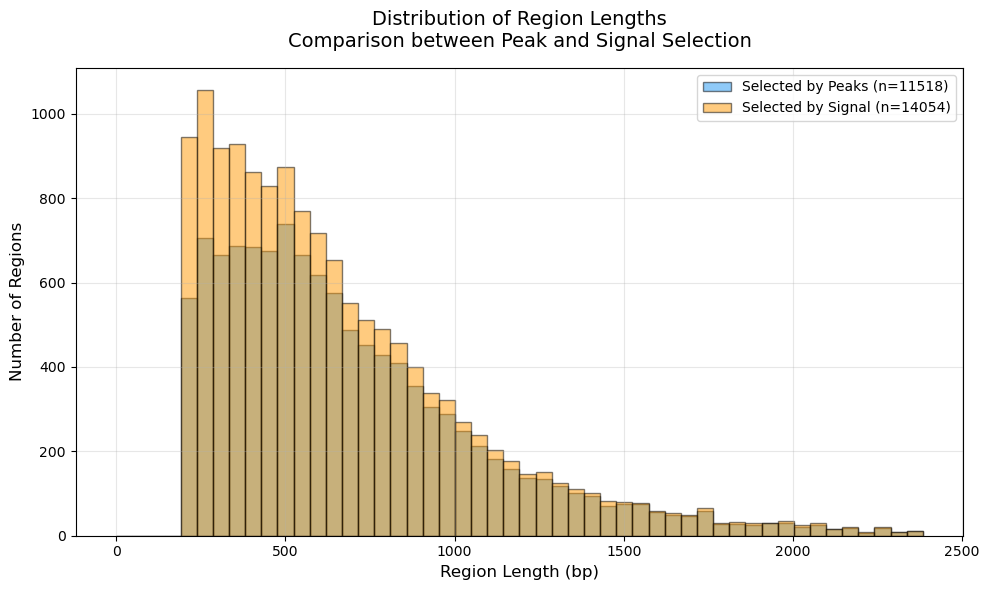

In [137]:
plot_region_length_comparison(both_df_by_peaks, both_df_by_signal, region_length_col='cpg_length')

In [138]:
both_df_sorted_by_cpg_length_peaks = both_df_by_peaks.sort_values(by='cpg_length', ascending=False)
both_df_sorted_by_cpg_length_peaks.head()
print_outlier_groups(both_df_sorted_by_cpg_length_peaks, "peaks")


First 5 outliers selected by peaks:
chr8:92,355,697-92,360,826                        enrichment: 1.3626280650780374
chr5:33,430,439-33,435,552                        enrichment: 2.470071303657851
chrX:12,086,982-12,092,060                        enrichment: 2.1001075874425448
chrX:12,076,861-12,081,915                        enrichment: 2.276204110567986
chr17:34,118,396-34,122,981                       enrichment: 4.9366568665330295

Middle 5 outliers selected by peaks:
chr15:41,788,815-41,789,416                       enrichment: 1.696689877221934
chr13:73,330,957-73,331,558                       enrichment: 1.5834188561288618
chr15:73,839,369-73,839,970                       enrichment: 1.542316189911826
chr4:125,066,550-125,067,151                      enrichment: 1.9953235385327164
chr11:85,352,647-85,353,248                       enrichment: 1.7126718326891337

Last 5 outliers selected by peaks:
chr12:54,313,169-54,313,370                       enrichment: 1.654889429671586
chr

In [139]:
both_df_sorted_by_cpg_length_signal = both_df_by_signal.sort_values(by='cpg_length', ascending=False)
both_df_sorted_by_cpg_length_signal.head()
print_outlier_groups(both_df_sorted_by_cpg_length_signal, "signal")


First 5 outliers selected by signal:
chr8:92,355,697-92,360,826                        enrichment: 1.3626280650780374
chr5:33,430,439-33,435,552                        enrichment: 2.470071303657851
chrX:12,086,982-12,092,060                        enrichment: 2.1001075874425448
chrX:12,076,861-12,081,915                        enrichment: 2.276204110567986
chr17:34,118,396-34,122,981                       enrichment: 4.9366568665330295

Middle 5 outliers selected by signal:
chr18:34,506,391-34,506,954                       enrichment: 1.9816344935499348
chr17:35,969,409-35,969,972                       enrichment: 1.328621611911817
chr8:71,542,724-71,543,287                        enrichment: 3.647098375423306
chr5:105,519,378-105,519,941                      enrichment: 1.9394437033015872
chr6:52,221,352-52,221,915                        enrichment: 1.7069508053534224

Last 5 outliers selected by signal:
chr5:118,380,802-118,381,003                      enrichment: 2.5277712988771075

# Neu only

In [140]:
neu_only_df_by_peaks.head()

,chr,start,end,neu_signal,nsc_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,neu_replicates_with_signal,nsc_replicates_with_signal,neu_replicate_signals,nsc_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,neu_replicates_with_peaks,nsc_replicates_with_peaks,neu_peak_scores_by_rep,nsc_peak_scores_by_rep,region_start,region_end
885,chr10,33624362,33624567,37.359741,0.0,inf,1.0,neu_only,neu_only,False,3,0,"24.53087866163172,54.081883270172064,33.46646151534485","0.0,0.0,0.0",1166,205,CpG:,841,3,0,3.64482;6.95828;3.58009,NaN,33623658,33624824
14215,chrX,169994005,169994235,50.380623,0.0,inf,1.0,neu_only,neu_only,False,3,0,"79.67720000298469,34.95183007097069,36.51283889463096","0.0,0.0,0.0",273,230,CpG:,1881,2,0,9.62838;3.81024,NaN,169993992,169994265
7660,chr2,144393401,144393650,33.685389,0.0,inf,1.0,neu_only,neu_only,False,3,0,"17.03210664824616,74.00945015090832,10.01461125449311","0.0,0.0,0.0",1390,249,CpG:,1686,3,0,3.24524;7.71701;2.83982,NaN,144393145,144394535
6111,chr18,37767918,37768507,13.572424,0.0,inf,1.0,neu_only,neu_only,False,2,0,"9.38683134468335,0.0,31.330439205317536","0.0,0.0,0.0",1935,589,CpG:,873,2,1,3.72878;3.59886,4.20965,37766904,37768839
9907,chr5,74620010,74620304,18.958589,0.0,inf,1.0,neu_only,neu_only,False,3,0,"32.64136631362104,4.651602477843059,19.582796868494743","0.0,0.0,0.0",414,294,CpG:,1154,2,0,3.13989;2.54413,NaN,74619862,74620276


In [141]:
# Generate summary statistics for numeric columns, ignoring inf values
# Replace inf values with NaN before calculating statistics
numeric_cols = ['neu_signal', 'nsc_signal', 'enrichment', 'region_length', 'cpg_length', 'pvalue']

stats_df = neu_only_df_by_peaks[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("neu only - by peaks, size:", len(neu_only_df_by_peaks))
stats_df

neu only - by peaks, size: 2260


,neu_signal,nsc_signal,enrichment,region_length,cpg_length,pvalue
count,2260.000000,2260.000000,2232.000000,2260.000000,2260.000000,2260.000000
mean,29.507385,12.032604,7.967952,3324.330531,496.410619,0.388673
std,32.456632,11.322424,120.646056,2636.659127,333.631442,0.322826
min,4.024988,0.000000,0.261386,216.000000,201.000000,0.100000
25%,16.968228,6.496295,1.543691,1683.000000,272.000000,0.100000
50%,23.097832,10.119908,2.345447,2635.000000,384.000000,0.200000
75%,33.017771,15.401393,3.786320,4033.000000,601.250000,0.700000
max,1072.926509,352.848302,5579.497140,34979.000000,3089.000000,1.000000


In [142]:
stats_df = neu_only_df_by_signal[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("neu only - by signal, size:", len(neu_only_df_by_signal))
stats_df

neu only - by signal, size: 160


,neu_signal,nsc_signal,enrichment,region_length,cpg_length,pvalue
count,160.000000,160.000000,132.000000,160.000000,160.000000,160.000000
mean,27.421894,3.535035,81.045821,1242.743750,479.687500,0.711458
std,23.150002,4.804976,491.689576,703.759332,313.330962,0.246373
min,5.046306,0.000000,0.431011,216.000000,201.000000,0.500000
25%,16.702493,0.217579,3.613799,723.500000,278.250000,0.500000
50%,21.497275,1.610475,10.220798,1061.000000,374.000000,0.500000
75%,30.927484,4.441004,27.436435,1662.000000,580.750000,1.000000
max,234.789945,21.318783,5579.497140,4197.000000,2184.000000,1.000000


In [143]:
print_across_distribution(neu_only_df_by_peaks, selection_type="peaks")


First 5 elements selected by peaks:
chr10:33,624,362-33,624,567                       enrichment: inf
chrX:169,994,005-169,994,235                      enrichment: inf
chr2:144,393,401-144,393,650                      enrichment: inf
chr18:37,767,918-37,768,507                       enrichment: inf
chr5:74,620,010-74,620,304                        enrichment: inf

Middle 5 elements selected by peaks:
chr9:123,156,818-123,157,109                      enrichment: 2.36034996297596
chr12:112,913,417-112,913,783                     enrichment: 2.359471577398999
chr3:87,997,017-87,997,448                        enrichment: 2.3584345712735666
chrX:11,807,041-11,807,919                        enrichment: 2.355141911242128
chrX:59,567,234-59,568,293                        enrichment: 2.353973903863342

Last 5 elements selected by peaks:
chr8:83,389,732-83,390,052                        enrichment: 0.4310105556755389
chr1:89,928,656-89,928,995                        enrichment: 0.39517246709698

In [144]:
print_across_distribution(nsc_only_df_by_signal, selection_type="signal")


First 5 elements selected by signal:
chr13:96,748,199-96,748,403                       enrichment: 0.1814765481139817
chr9:69,769,052-69,769,266                        enrichment: 0.1415598478707084
chr13:94,875,360-94,875,562                       enrichment: 0.0827075770891553
chr15:102,981,650-102,982,309                     enrichment: 0.0
chr12:20,990,202-20,991,305                       enrichment: 0.0

Last 5 elements selected by signal:
chr9:69,769,052-69,769,266                        enrichment: 0.1415598478707084
chr13:94,875,360-94,875,562                       enrichment: 0.0827075770891553
chr15:102,981,650-102,982,309                     enrichment: 0.0
chr12:20,990,202-20,991,305                       enrichment: 0.0
chr6:136,399,201-136,399,416                      enrichment: 0.0


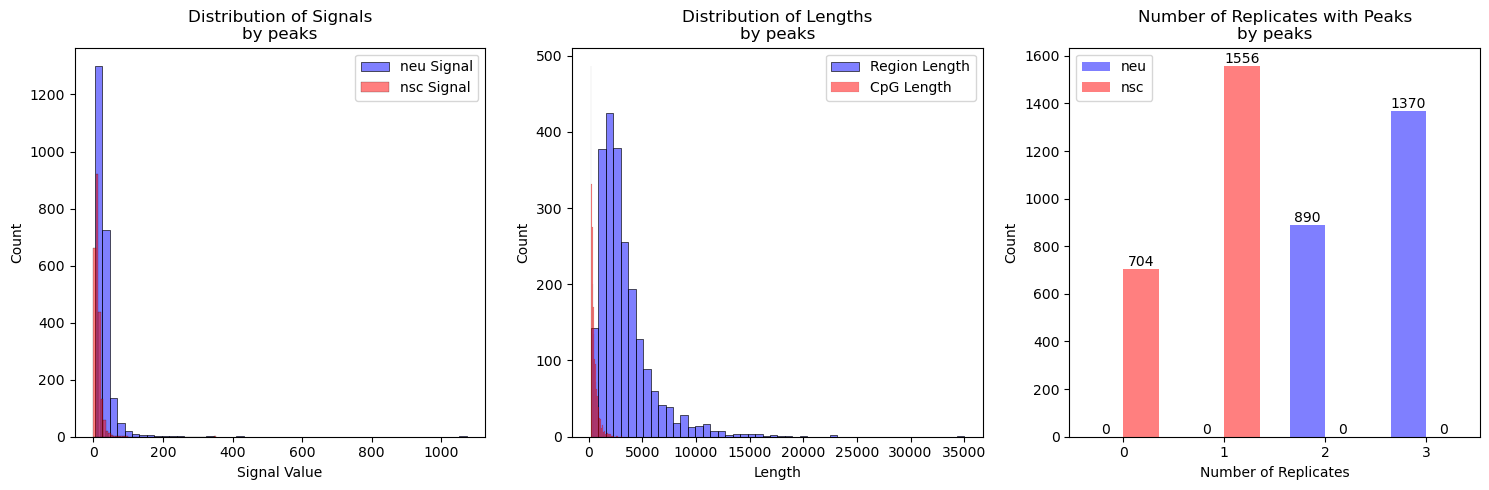

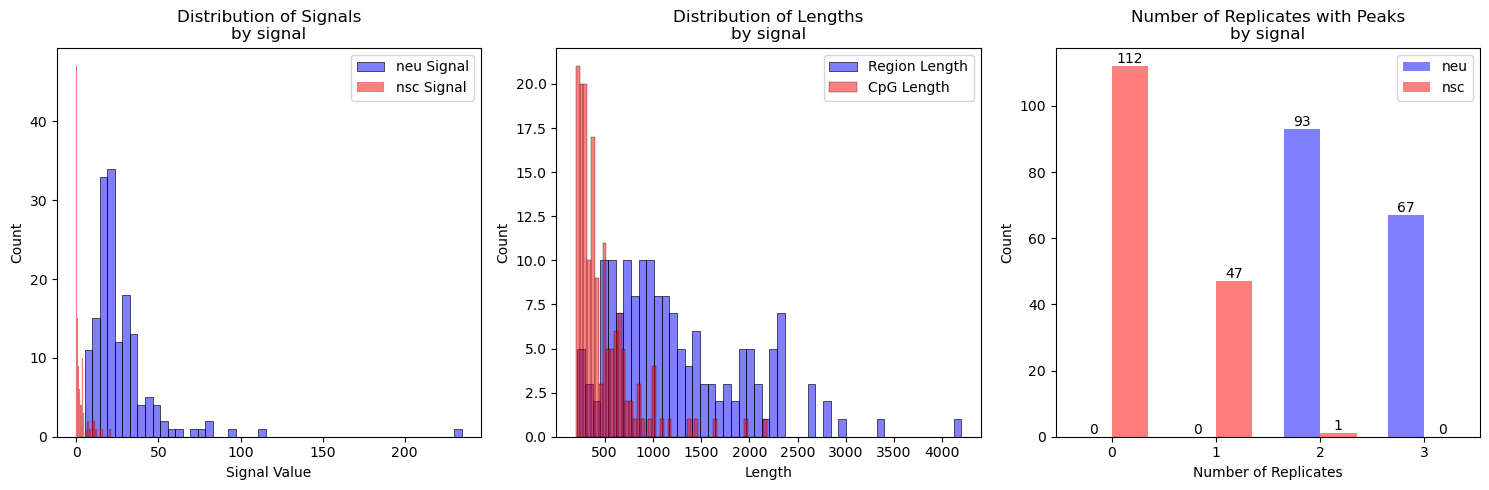

In [145]:
plot_neu_only_distributions(neu_only_df_by_peaks, title="by peaks")
plot_neu_only_distributions(neu_only_df_by_signal, title="by signal")

# NSC only

In [146]:
nsc_only_df_by_peaks.head()

,chr,start,end,neu_signal,nsc_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,neu_replicates_with_signal,nsc_replicates_with_signal,neu_replicate_signals,nsc_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,neu_replicates_with_peaks,nsc_replicates_with_peaks,neu_peak_scores_by_rep,nsc_peak_scores_by_rep,region_start,region_end
12574,chr8,71465316,71465587,181.575382,46.942196,3.868063,0.1,both,nsc_only,False,3,3,"179.48797590917533,213.0858339208362,152.1523372923697","48.50046735170579,43.89792075780578,48.42819885546639",4574,271,CpG:,1130,1,2,25.9043,8.44185;9.92702,71461479,71466053
12996,chr8,122282660,122282861,175.686906,51.435103,3.415700,0.1,both,nsc_only,False,3,3,"157.16054399905377,227.10991276179064,142.79026003456846","41.8658998518433,61.31858665911655,51.120821652739515",4694,201,CpG:,1517,0,3,NaN,9.89181;15.9955;17.3412,122280701,122285395
4781,chr15,101052673,101054340,32.343044,9.718315,3.328050,0.1,both,nsc_only,False,3,3,"28.868709283054777,47.61543085221485,20.544990863749284","8.94454713309616,1.8141880999919782,18.3962112407029",4133,1667,CpG:,1355,1,3,"4.74337,4.70715",3.91514;4.254;3.54848,101050671,101054804
6117,chr18,38189421,38189937,39.420762,13.236302,2.978231,0.1,both,nsc_only,False,3,3,"37.460499440030055,54.16921472948427,26.63257048448507","19.415987307609207,12.3562088922017,7.936710534519805",5139,516,CpG:,876,1,3,5.51976,5.91876;4.93032;5.87599,38189057,38194196
6957,chr2,25863731,25864418,42.975659,15.450467,2.781512,0.1,both,nsc_only,False,3,3,"38.95287244331783,53.63082851381107,36.343277264567256","15.415673241517561,14.509917331642061,16.42581049318324",4635,687,CpG:,782,1,2,6.09882,5.13241;6.00029,25861391,25866026


In [147]:
# Generate summary statistics for numeric columns, ignoring inf values
# Replace inf values with NaN before calculating statistics
numeric_cols = ['neu_signal', 'nsc_signal', 'enrichment', 'region_length', 'cpg_length', 'pvalue']

stats_df = nsc_only_df_by_peaks[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("nsc only - by peaks, size:", len(nsc_only_df_by_peaks))
stats_df

nsc only - by peaks, size: 442


,neu_signal,nsc_signal,enrichment,region_length,cpg_length,pvalue
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,16.158688,19.210451,0.855983,2947.135747,618.907240,0.518326
std,20.179410,9.618829,0.622676,2005.357822,535.260034,0.323005
min,0.000000,3.068555,0.000000,267.000000,201.000000,0.100000
25%,6.965563,12.930488,0.398543,1595.500000,275.250000,0.200000
50%,11.540266,16.698706,0.714940,2459.000000,435.000000,0.400000
75%,17.697983,23.836881,1.139285,3755.000000,752.500000,0.700000
max,209.848434,78.940230,3.868063,14598.000000,3882.000000,1.000000


In [148]:
stats_df = nsc_only_df_by_signal[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("nsc only - by signal, size:", len(nsc_only_df_by_signal))
stats_df

nsc only - by signal, size: 6


,neu_signal,nsc_signal,enrichment,region_length,cpg_length,pvalue
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,1.531770,18.677273,0.067624,672.500000,432.833333,0.805556
std,2.394141,8.692850,0.080468,360.218128,374.503093,0.221527
min,0.000000,8.806015,0.000000,267.000000,202.000000,0.500000
25%,0.000000,13.453725,0.000000,365.750000,206.500000,0.666667
50%,0.364162,17.081350,0.041354,695.000000,214.500000,0.833333
75%,2.013615,22.027856,0.126847,990.500000,548.000000,1.000000
max,6.020251,33.173716,0.181477,1033.000000,1103.000000,1.000000


In [149]:
print_across_distribution(nsc_only_df_by_peaks, selection_type="peaks")


First 5 elements selected by peaks:
chr8:71,465,316-71,465,587                        enrichment: 3.86806326036893
chr8:122,282,660-122,282,861                      enrichment: 3.415700490590154
chr15:101,052,673-101,054,340                     enrichment: 3.3280503905655827
chr18:38,189,421-38,189,937                       enrichment: 2.978230688777806
chr2:25,863,731-25,864,418                        enrichment: 2.7815119986807453

Middle 5 elements selected by peaks:
chr11:97,114,566-97,115,340                       enrichment: 0.7195385958970835
chr2:168,262,792-168,263,124                      enrichment: 0.7171200427937914
chr5:108,774,782-108,775,210                      enrichment: 0.7127605527131464
chr6:70,956,191-70,957,293                        enrichment: 0.7098835398413053
chr10:80,186,652-80,186,972                       enrichment: 0.7092565980769967

Last 5 elements selected by peaks:
chr11:84,524,913-84,525,813                       enrichment: 0.0232555214589862
ch

In [150]:
print_across_distribution(nsc_only_df_by_signal, selection_type="signal")


First 5 elements selected by signal:
chr13:96,748,199-96,748,403                       enrichment: 0.1814765481139817
chr9:69,769,052-69,769,266                        enrichment: 0.1415598478707084
chr13:94,875,360-94,875,562                       enrichment: 0.0827075770891553
chr15:102,981,650-102,982,309                     enrichment: 0.0
chr12:20,990,202-20,991,305                       enrichment: 0.0

Last 5 elements selected by signal:
chr9:69,769,052-69,769,266                        enrichment: 0.1415598478707084
chr13:94,875,360-94,875,562                       enrichment: 0.0827075770891553
chr15:102,981,650-102,982,309                     enrichment: 0.0
chr12:20,990,202-20,991,305                       enrichment: 0.0
chr6:136,399,201-136,399,416                      enrichment: 0.0


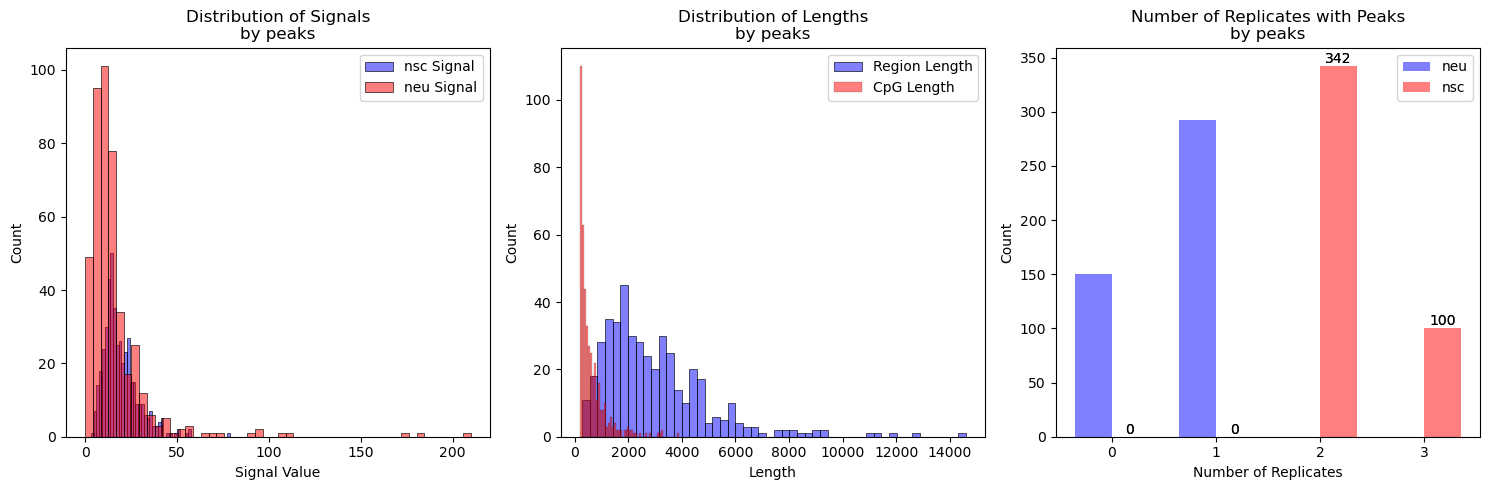

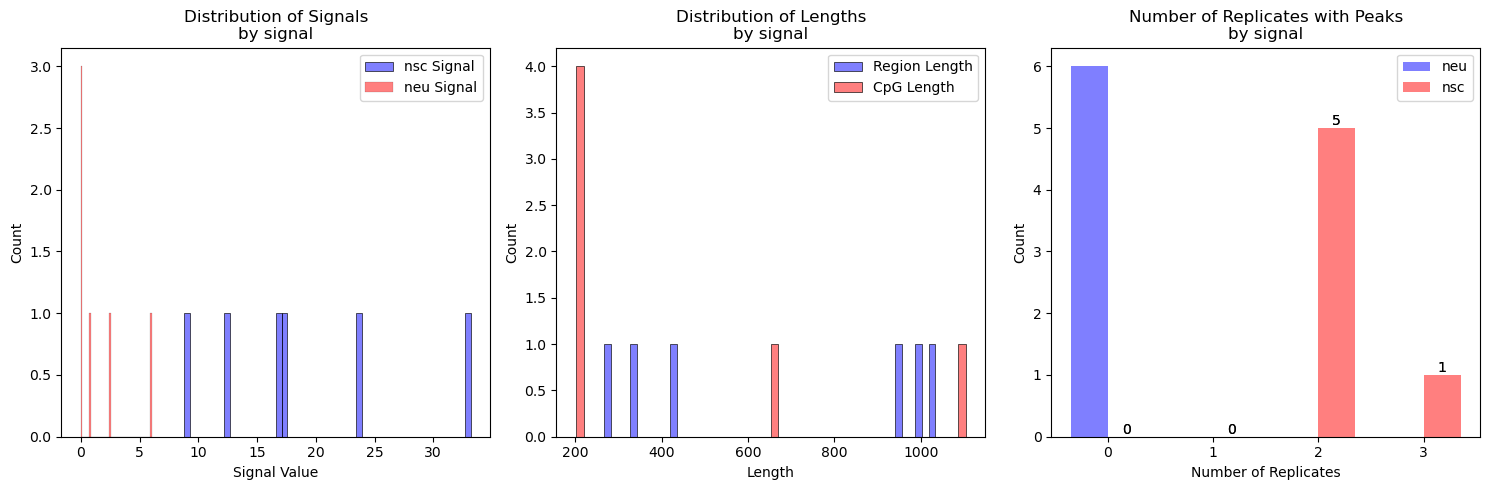

In [151]:
plot_nsc_only_distributions(nsc_only_df_by_peaks, title="by peaks")
plot_nsc_only_distributions(nsc_only_df_by_signal, title="by signal")

# Create output files

## UP in Neu

In [152]:
up_enriched_signal_1 = both_df_by_signal[(both_df_by_signal['enrichment'] > 1) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
up_enriched_signal_1_5 = both_df_by_signal[(both_df_by_signal['enrichment'] > 1.5) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()    
up_enriched_signal_2 = both_df_by_signal[(both_df_by_signal['enrichment'] > 2) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
up_enriched_peaks_1 = both_df_by_peaks[(both_df_by_peaks['enrichment'] > 1) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()
up_enriched_peaks_1_5 = both_df_by_peaks[(both_df_by_peaks['enrichment'] > 1.5) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()    
up_enriched_peaks_2 = both_df_by_peaks[(both_df_by_peaks['enrichment'] > 2) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()

In [153]:
print("up_enriched_signal_1.shape:",   up_enriched_signal_1.shape)
print("up_enriched_signal_1_5.shape:", up_enriched_signal_1_5.shape)
print("up_enriched_signal_2.shape:",   up_enriched_signal_2.shape)
print("up_enriched_peaks_1.shape:",    up_enriched_peaks_1.shape)
print("up_enriched_peaks_1_5.shape:",  up_enriched_peaks_1_5.shape)
print("up_enriched_peaks_2.shape:",    up_enriched_peaks_2.shape)

up_enriched_signal_1.shape: (11586, 24)
up_enriched_signal_1_5.shape: (8342, 24)
up_enriched_signal_2.shape: (5535, 24)
up_enriched_peaks_1.shape: (9645, 24)
up_enriched_peaks_1_5.shape: (6837, 24)
up_enriched_peaks_2.shape: (4440, 24)


## UP in NSC

In [154]:
down_enriched_signal_1 = both_df_by_signal[(both_df_by_signal['enrichment'] < 1.0 ) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
down_enriched_signal_08 = both_df_by_signal[(both_df_by_signal['enrichment'] < 0.8 ) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
down_enriched_signal_05 = both_df_by_signal[(both_df_by_signal['enrichment'] < 0.5 ) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
down_enriched_peaks_1 = both_df_by_peaks[(both_df_by_peaks['enrichment'] < 1.0) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()
down_enriched_peaks_08 = both_df_by_peaks[(both_df_by_peaks['enrichment'] < 0.8) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()
down_enriched_peaks_05 = both_df_by_peaks[(both_df_by_peaks['enrichment'] < 0.5) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()

In [155]:
print("down_enriched_signal_1.shape:",  down_enriched_signal_1.shape)
print("down_enriched_signal_08.shape:", down_enriched_signal_08.shape)
print("down_enriched_signal_05.shape:", down_enriched_signal_05.shape)
print("down_enriched_peaks_1.shape:",   down_enriched_peaks_1.shape)
print("down_enriched_peaks_08.shape:",  down_enriched_peaks_08.shape)
print("down_enriched_peaks_05.shape:",  down_enriched_peaks_05.shape)

down_enriched_signal_1.shape: (2220, 24)
down_enriched_signal_08.shape: (1189, 24)
down_enriched_signal_05.shape: (271, 24)
down_enriched_peaks_1.shape: (1761, 24)
down_enriched_peaks_08.shape: (874, 24)
down_enriched_peaks_05.shape: (118, 24)


## Save output files

In [156]:
up_enriched_signal_1.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_signal_1.csv', index=False)
up_enriched_signal_1_5.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_signal_1_5.csv', index=False)
up_enriched_signal_2.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_signal_2.csv', index=False)
up_enriched_peaks_1.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_peaks_1.csv', index=False)
up_enriched_peaks_1_5.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_peaks_1_5.csv', index=False)
up_enriched_peaks_2.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_peaks_2.csv', index=False)

down_enriched_signal_1.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_signal_1.csv', index=False)
down_enriched_signal_08.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_signal_08.csv', index=False)
down_enriched_signal_05.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_signal_05.csv', index=False)
down_enriched_peaks_1.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_peaks_1.csv', index=False)
down_enriched_peaks_08.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_peaks_08.csv', index=False)
down_enriched_peaks_05.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_peaks_05.csv', index=False)

neu_only_df_by_signal.to_csv(f'{OUTPUT_LISTS_PATH}/neu_only_df_by_signal.csv', index=False)
nsc_only_df_by_signal.to_csv(f'{OUTPUT_LISTS_PATH}/nsc_only_df_by_signal.csv', index=False)
neu_only_df_by_peaks.to_csv(f'{OUTPUT_LISTS_PATH}/neu_only_df_by_peaks.csv', index=False)
nsc_only_df_by_peaks.to_csv(f'{OUTPUT_LISTS_PATH}/nsc_only_df_by_peaks.csv', index=False)